# Восстановление золота из руды

Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

In [2]:
gold_recovery_train_new = pd.read_csv('/datasets/gold_recovery_train_new.csv')
gold_recovery_full_new = pd.read_csv('/datasets/gold_recovery_full_new.csv')
gold_recovery_test_new = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [3]:
gold_recovery_train_new.info()
gold_recovery_train_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
gold_recovery_full_new.info()
gold_recovery_full_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
gold_recovery_test_new.info()
gold_recovery_test_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
F = gold_recovery_train_new['rougher.input.feed_au'] 
C = gold_recovery_train_new['rougher.output.concentrate_au'] 
T = gold_recovery_train_new['rougher.output.tail_au'] 

print('Разница между расчетной эффективностью и эффективностью в таблице')
np.abs(C*(F-T)/(F*(C-T))*100 - gold_recovery_train_new['rougher.output.recovery'] ).mean()

Разница между расчетной эффективностью и эффективностью в таблице


9.682896147825551e-15

In [7]:
set_train = set(gold_recovery_train_new.columns)
set_test = set(gold_recovery_test_new.columns)
print('Колонки, которых нет в тестовой выборке')
no_col = set_train.difference(set_test)
no_col

Колонки, которых нет в тестовой выборке


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [8]:
def v_to_nan(df):
    cop = df.copy()
    describe = cop.describe()
    for i in cop.columns.values:
        if i == 'date':
            continue
        q =  describe[i]
        q1 = q['25%']
        q3 = q['75%']
        mq = q3 - q1
        filter_up =  (cop[i] > (q3 + mq*1.5))
        filter_down = (0 < cop[i]) & (cop[i] < (q1 - mq*1.5))
        cop.loc[filter_up, i] = float('Nan')
        cop.loc[filter_down, i] = float('Nan')
        print('Колонка ' + i + ' должно быть изменено '+str(len(cop[cop.isnull().any(1)]))+ ' строк')

def prepare_f(df): 
    new_df = df.copy() 
    # date - уникальная колонка, её можно использовать в качестве индекса, после перевода в таймстемп
    new_df['date'] = pd.to_datetime(new_df['date'])
    new_df['date'] =  new_df['date'].apply(lambda x: int(x.timestamp()))
    new_df = new_df.set_index('date')
    # в данных колонках есть nan значения
    nancol = new_df.columns[new_df.isna().any()].tolist()
    # заполню медианым значением
    for i in nancol:
        new_df[i].fillna(new_df[i].median(), inplace = True)
    return new_df

x_train = prepare_f(gold_recovery_train_new) 

# есть ли выбросы, если да, то сколько нужно обнулить и заполнить медианым значением()
v_to_nan(x_train)


Колонка final.output.concentrate_ag должно быть изменено 397 строк
Колонка final.output.concentrate_pb должно быть изменено 659 строк
Колонка final.output.concentrate_sol должно быть изменено 1399 строк
Колонка final.output.concentrate_au должно быть изменено 1827 строк
Колонка final.output.recovery должно быть изменено 2293 строк
Колонка final.output.tail_ag должно быть изменено 2434 строк
Колонка final.output.tail_pb должно быть изменено 2445 строк
Колонка final.output.tail_sol должно быть изменено 3071 строк
Колонка final.output.tail_au должно быть изменено 3181 строк
Колонка primary_cleaner.input.sulfate должно быть изменено 3186 строк
Колонка primary_cleaner.input.depressant должно быть изменено 3198 строк
Колонка primary_cleaner.input.feed_size должно быть изменено 3345 строк
Колонка primary_cleaner.input.xanthate должно быть изменено 3428 строк
Колонка primary_cleaner.output.concentrate_ag должно быть изменено 3570 строк
Колонка primary_cleaner.output.concentrate_pb должно быть 

### Вывод

Разница между расчётной эффективностью и эффективностью в таблице крайне мала, а значит данные корректны. Были обработаны nan значения подстановкой медианного значения. Выбросов очень много, скорее всего распределение некоторых колонок - не нормальное, а значит с такими выбросами ничего нельзя сделать. В данном случае, счиатю правильным выбросы вообще просто не трогать. Формировать гистограммы или qq графики для такого количество переменных - нерационально. 

В тестовой выборке отсутсвуют данные по результатам очистки: концетрации веществ и какие хвосты. Ещё некоторые специфические данные. Скорее всего они заносятся сильно потом, что нормально.

## Анализ данных

In [9]:
mas_etap = ['rougher', 'primary_cleaner', 'final']

def dis_conc(etap):
    print('Этап: '+etap)
    display(x_train[[etap+'.output.concentrate_ag',etap+'.output.concentrate_pb',etap+'.output.concentrate_au']].mean())
print('средняя концетрация веществ')  
for i in mas_etap:
    dis_conc(i)

средняя концетрация веществ
Этап: rougher


rougher.output.concentrate_ag    11.775812
rougher.output.concentrate_pb     7.664555
rougher.output.concentrate_au    19.439958
dtype: float64

Этап: primary_cleaner


primary_cleaner.output.concentrate_ag     8.200916
primary_cleaner.output.concentrate_pb     9.590957
primary_cleaner.output.concentrate_au    32.386836
dtype: float64

Этап: final


final.output.concentrate_ag     5.142023
final.output.concentrate_pb    10.132971
final.output.concentrate_au    44.003792
dtype: float64

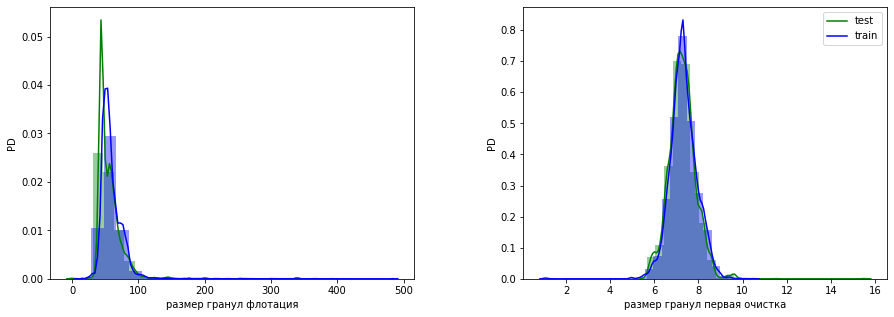

Статистические показатели:
rougher.input.feed_size
Тестовая  Дисперсия: 364.11  Ср. откл.: 19.08  Среднее: 55.95
Тренировочная  Дисперсия: 497.7  Ср. откл.: 22.31  Среднее: 60.06
primary_cleaner.input.feed_size
Тестовая  Дисперсия: 0.37  Ср. откл.: 0.61  Среднее: 7.27
Тренировочная  Дисперсия: 0.38  Ср. откл.: 0.61  Среднее: 7.32


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(gold_recovery_test_new['rougher.input.feed_size'], bins=25,ax = axes[0], color="g")
sns.distplot(x_train['rougher.input.feed_size'], bins=25, ax = axes[0],color="b")
axes[0].set_xlabel('размер гранул флотация')
axes[0].set_ylabel('PD')

sns.distplot(gold_recovery_test_new['primary_cleaner.input.feed_size'], bins=25,ax = axes[1], color="g")
sns.distplot(x_train['primary_cleaner.input.feed_size'], bins=25,ax = axes[1], color="b")
axes[1].set_xlabel('размер гранул первая очистка')
axes[1].set_ylabel('PD')

blue_line = mlines.Line2D([], [], color='blue', markersize=15, label='train')
green_line = mlines.Line2D([], [], color='green', markersize=15, label='test')
plt.legend(handles=[green_line,blue_line])
plt.subplots_adjust(wspace= 0.3)

plt.show()
print("Статистические показатели:")
d = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']
for i in d:
    q = gold_recovery_test_new[i].describe() 
    q1= x_train[i].describe()
    print(i)
    print('Тестовая ','Дисперсия: '+ str(np.round(q['std']**2,2)),' Ср. откл.: '+ str(np.round(q['std'],2)),' Среднее: '+ str(np.round(q['mean'],2)))
    print('Тренировочная ','Дисперсия: '+ str(np.round(q1['std']**2,2)),' Ср. откл.: '+ str(np.round(q1['std'],2)),' Среднее: '+ str(np.round(q1['mean'],2)))

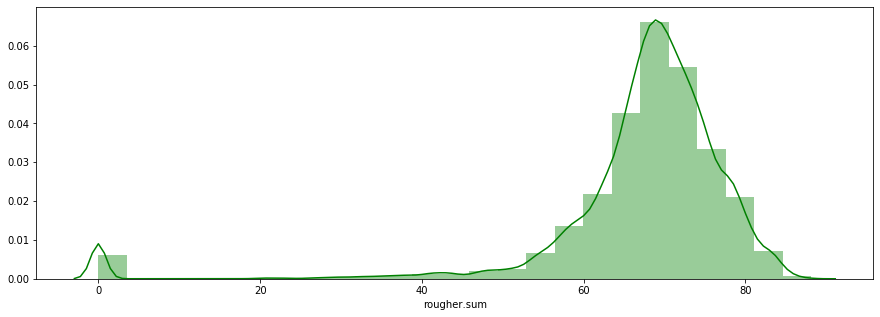

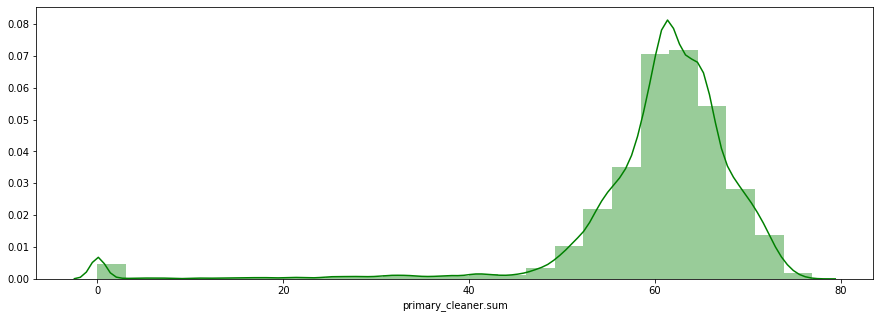

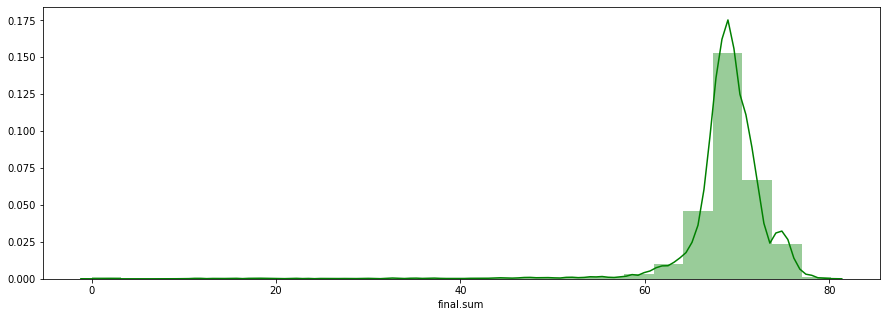

In [11]:
mas = ['concentrate_pb', 'concentrate_ag', 'concentrate_au', 'concentrate_sol']
def dis_sum_conc(df, etap):
    df[etap+'.sum'] = 0
    for i in mas:
        df[etap+'.sum']  += df[etap+'.output.'+i] 
    
for i in mas_etap:
    dis_sum_conc(x_train,i)
    fig, axes = plt.subplots(1, 1, figsize=(15, 5))
    sns.distplot(x_train[i+'.sum'], bins=25,ax = axes, color="g")
    plt.show()

In [12]:
# заполняю средними значениями нулевых концетраций по похожему времени
def null_conc(df, etap):
    for x in df[df[etap + '.sum'] == 0].index.tolist():
        q = df[(x-2*3600 <= df.index) & (df.index <= x+2*3600) & (df.index != x)].mean()
        for m in mas:
            df.loc[df.index == x, etap+'.output.'+m] = q[etap+'.output.'+m]
        
for i in mas_etap:
    null_conc(x_train,i)

for i in mas_etap:
    dis_sum_conc(x_train,i)


In [13]:
for i in mas_etap:
    display(x_train[x_train[i + '.sum'] == 0])

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.sum,primary_cleaner.sum,final.sum
date,,,,,,,,,,,,,,,,,,,,,
1502276399,3.506531,8.745850,3.321447,21.399486,73.483183,8.090166,3.439640,6.728329,2.824367,131.864936,...,-399.462116,15.989586,-502.338864,11.999782,-500.049887,15.011911,-499.306538,0.0,57.727026,36.973314
1515110399,5.982324,10.076719,13.375464,44.376450,44.174970,11.228311,2.767689,7.332055,3.733781,56.204231,...,-499.840696,11.058438,-499.855543,8.999975,-500.011754,10.983988,-500.088136,0.0,60.296882,73.810957
1515113999,6.186754,10.214685,13.384156,43.594238,68.349846,11.084557,2.626481,7.555230,3.600809,59.403051,...,-497.893154,11.012123,-500.173076,8.991099,-500.100074,11.009853,-499.477321,0.0,61.019955,73.379833
1515117599,6.074559,10.210053,13.327125,43.846478,66.409249,11.539101,2.756667,7.211334,3.710182,59.153089,...,-501.681810,11.062787,-500.461662,8.964838,-499.972714,10.993435,-500.061816,0.0,61.123477,73.458216
1515121199,5.914128,9.865865,13.382017,44.499354,65.133852,11.199468,2.542308,7.805790,3.688805,57.892726,...,-500.820456,10.985730,-499.881168,9.054258,-499.952823,10.986207,-499.903818,0.0,60.875206,73.661364
1515124799,5.975621,9.596601,13.327818,44.529115,58.620105,10.980890,2.401098,7.390486,3.610608,49.118611,...,-499.198160,11.001389,-499.586324,9.028039,-499.845392,11.000692,-499.882406,0.0,59.925362,73.429155


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.sum,primary_cleaner.sum,final.sum
date,,,,,,,,,,,,,,,,,,,,,


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.sum,primary_cleaner.sum,final.sum
date,,,,,,,,,,,,,,,,,,,,,
1467781199,0.0,0.0,0.0,0.0,0.0,6.266939,2.146631,7.240419,3.552111,29.986027,...,-499.990413,16.993432,-501.022669,14.951274,-499.908216,24.984095,-499.000500,67.674543,63.198990,0.0
1467784799,0.0,0.0,0.0,0.0,0.0,6.156921,2.036552,8.240251,3.398861,29.997157,...,-499.379420,16.938729,-500.901347,15.060903,-500.161562,24.958637,-499.600205,75.028906,57.722540,0.0
1467788399,0.0,0.0,0.0,0.0,0.0,2.537365,0.939253,5.531964,2.174925,30.019671,...,-513.284934,16.607490,-498.514638,11.109718,-499.611735,25.025326,-499.049808,81.550911,64.586471,0.0
1484747999,0.0,0.0,0.0,0.0,0.0,0.135709,0.248237,10.817715,0.541934,39.986329,...,-499.244981,-0.176485,-500.816086,8.093619,-500.197658,19.986522,-602.355855,81.583286,5.943633,0.0
1484751599,0.0,0.0,0.0,0.0,0.0,7.804423,3.130217,5.586386,3.420555,113.746848,...,-500.025438,-0.178880,-491.880038,8.035219,-481.808531,19.941542,-595.360820,80.309850,54.803681,0.0
1484755199,0.0,0.0,0.0,0.0,0.0,4.990116,2.905931,5.256589,4.213483,74.575893,...,-499.556599,-0.173919,-446.036106,3.145675,-240.872031,2.319944,-642.122184,74.960131,58.578118,0.0
1484758799,0.0,0.0,0.0,0.0,0.0,3.166338,2.024801,4.348096,3.584731,0.067424,...,-500.120965,-0.173552,-563.737693,0.679409,-746.432635,0.259505,-809.057864,72.865254,53.730679,0.0


In [14]:

for i in mas_etap:
    x_train.drop(x_train.iloc[np.where(x_train[i + '.sum'] == 0)[0]].index, axis = 0, inplace = True)

### Вывод

По концетрации на разных этапах, как и ожидается, доля золота растет. Остальное - падает/растет. Я не химик, больше сказать не могу.

Распределение размера гранул в тесовой выборке и в тренировочной похоже. Для флоатации разница в дисперсии большая, за счет хвостов, но в общем и целом достаточно похожи.

В некоторых записях концетрация была непроставлены. Такие записи заменил на средние показатели +- 2 часа, так как по условию показатели по близкому времени похожи. Оставшиеся записи с нулевыми концетрациями удалил. Их не много.

## Модель

In [15]:
# 2 целевых признака - 2 модели
y_rougher = x_train['rougher.output.recovery'] 
y_final = x_train['final.output.recovery'] 
x_train = x_train.drop(['rougher.output.recovery', 'final.output.recovery'] , axis = 1)

In [16]:
# так как колонок нет, то и в тренировочной выборке они не нужны
set_train = set(x_train.columns)
set_test = set(gold_recovery_test_new.columns)
x_train.drop(list(set_train.difference(set_test)) , axis = 1, inplace = True)


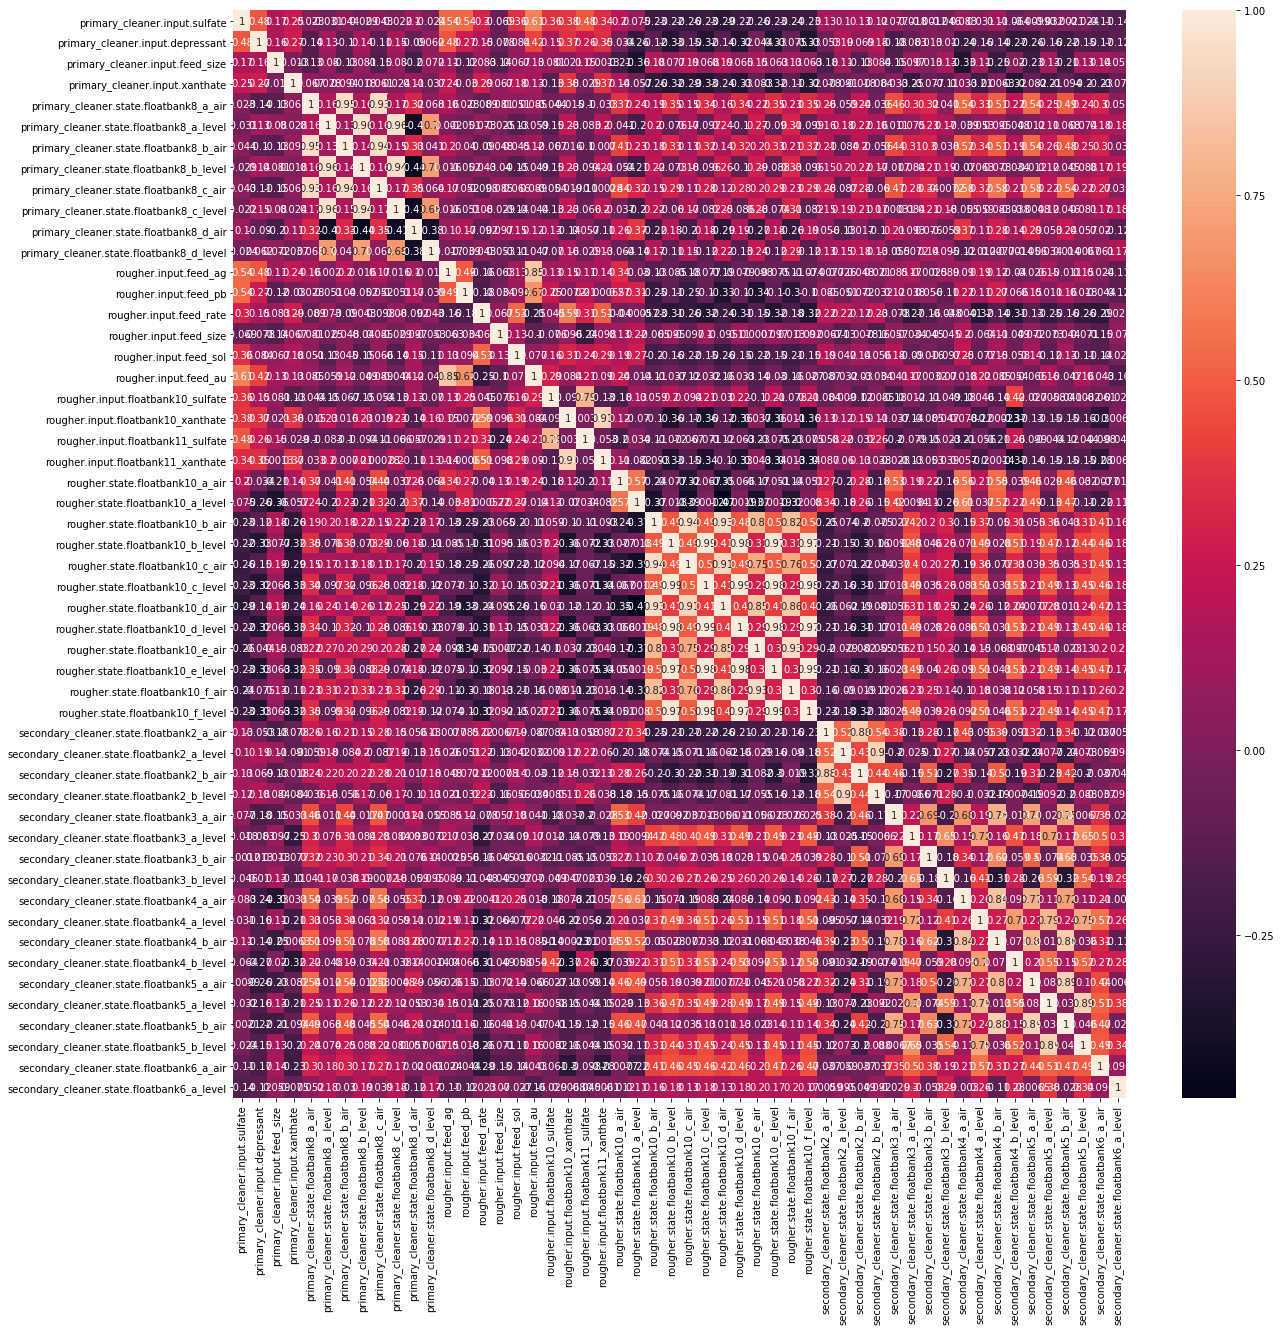

In [17]:
# проверка корреляции
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(x_train.corr(), annot = True, ax = ax)
plt.show()

In [18]:
# удалить у кого корреляция больше 0.75
corr_matrix = x_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.75)] 
x_train.drop(to_drop, axis=1, inplace=True)

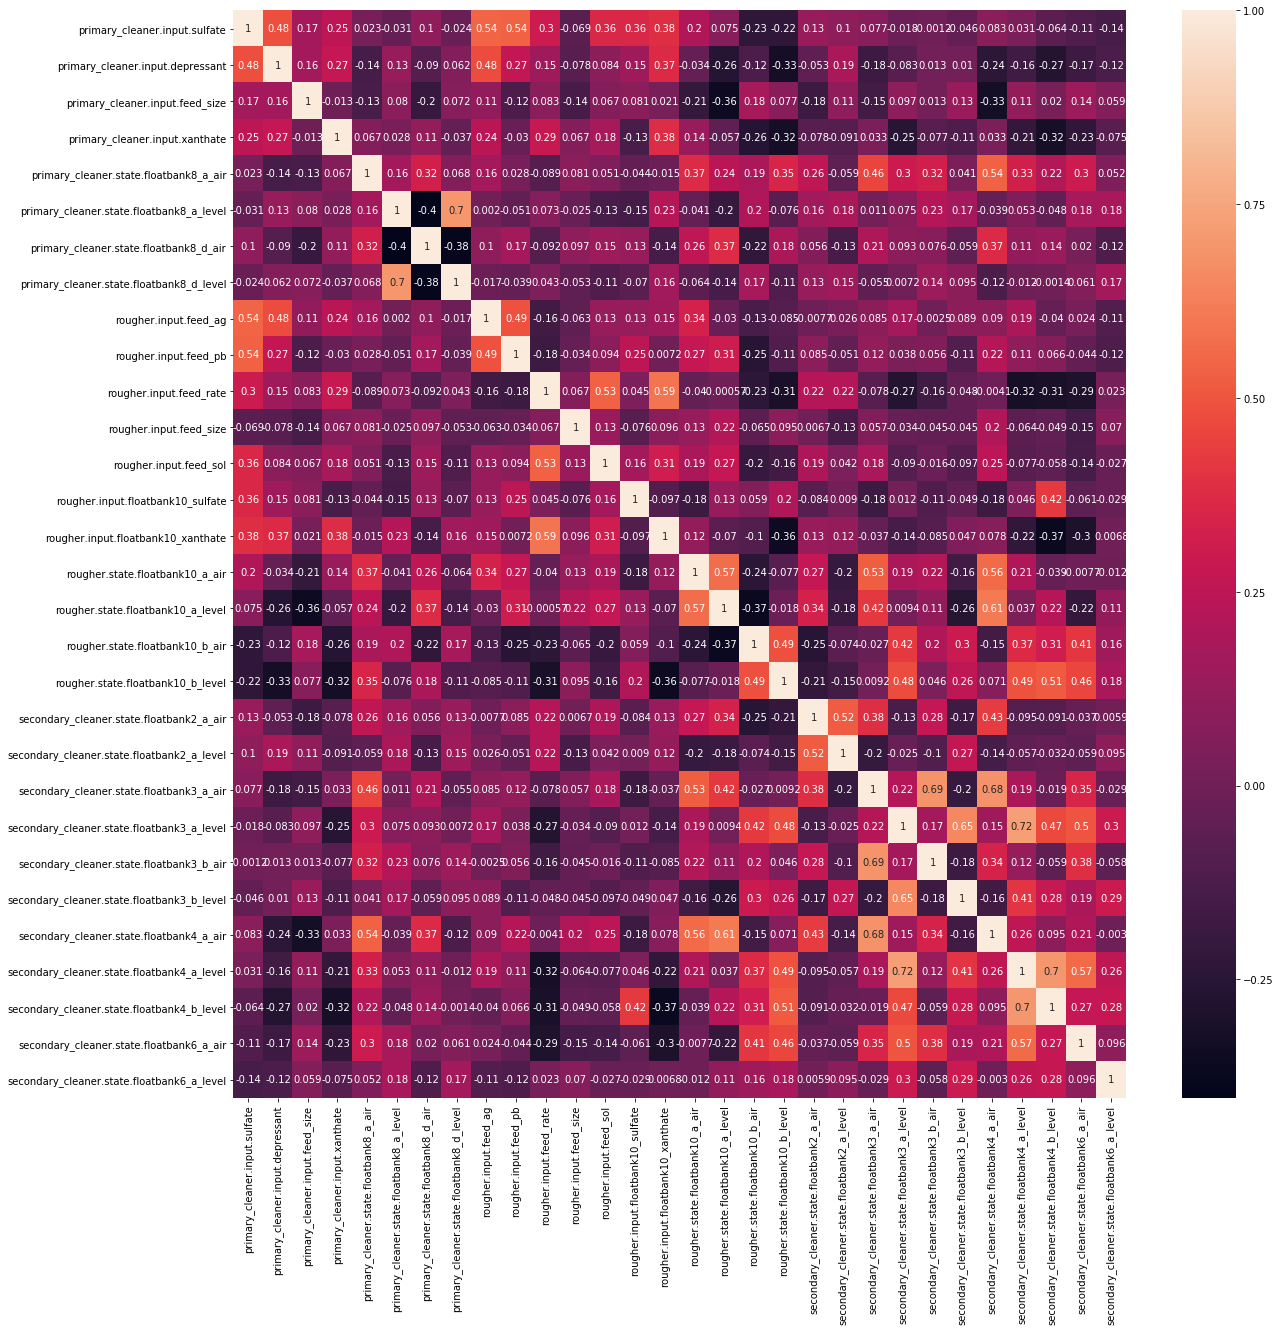

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(x_train.corr(), annot = True, ax = ax)
plt.show()

In [20]:
# подготавливаю x_test
x_test =  prepare_f(gold_recovery_test_new) 

# удаляю ненужные колонки
set_train = set(x_train.columns)
set_test = set(x_test.columns)
x_test.drop(list(set_test.difference(set_train)) , axis = 1, inplace = True)

In [21]:
# Итоговая таблица с результатами моделей
result = pd.DataFrame({'name_y':[],'score':[],'name':[],'model':[]})

def log(df):
    cop = df.copy()
    describe = cop.describe()
    for i in cop.columns.values:
        #так как есть отрицательные значения, то смещаю так, 
        #что бы логарифм минимального значение равнялся 0
        cop[i] = np.log( cop[i] - describe[i]['min'] + 1)
    return cop

def smape(q,q_):
    s = 0
    for i in range(len(q)):
        s += (np.abs(q.iloc[i] - q_.iloc[i]))/(np.abs(q.iloc[i])+np.abs(q_.iloc[i]))
    return 200*s/len(q)

def score_model(name, model, params, x_train, y_train):   
    scores = []
    rs = ShuffleSplit(n_splits=5, test_size=.20, random_state=10)
    for train_index, val_index in rs.split(x_train):
        x_train_cv, y_train_cv = x_train.iloc[train_index], y_train.iloc[train_index]
        x_val_fold, y_val_fold = x_train.iloc[val_index], y_train.iloc[val_index]
        
        # Масштабирую значения    
        scaler = StandardScaler()
        scaler.fit(x_train_cv) 
        x_train_cv = scaler.transform(x_train_cv)
        x_val_fold = scaler.transform(x_val_fold)

        if 'LinearRegression' in name:
            model_obj = model(**params).fit(x_train_cv, y_train_cv)
        elif 'SGDRegressor' in name:
            #Поэтапное обучение для лучших результатов
            my_rng = range(2000 ,len(x_train_cv), 2000)
            previous = 0
            model_obj = model(random_state = 10,**params)
            for m in my_rng:
                model_obj.partial_fit(x_train_cv[previous:m], y_train_cv[previous:m])       
                previous = m
        else:
            model_obj = model(random_state = 10,**params).fit(x_train_cv, y_train_cv)
           
        score = smape(y_val_fold, pd.Series(model_obj.predict(x_val_fold)))
        scores.append(score)
    return {'score':np.array(scores).mean(),'model':model_obj}

# руками перебираю все параметры и ищу лучшую модель
def gridsearch(name, name_y, model, params, new_par, x, y, i = 0 ):
    global result
    if i < len(params):
        best = {}
        for j in params[list(params.keys())[i]]:
            new_par[list(params.keys())[i]] = j
            gr = gridsearch(name, name_y, model, params, new_par, x, y, i+1)
            if best.get('score') == None:
                best = gr.copy()
            else:
                if best['score'] < gr['score']:
                    best['score'] = gr['score']
                    best['model'] = gr['model']
        if i == 0:
            result = result.append({'score':best['score'] ,'name':name,'name_y':name_y,'model':best['model'] }, ignore_index=True)
        return best
    else:            
        return score_model(name, model, new_par, x, y)


In [22]:
%%time
param_grid = {
     'max_depth': range(4,7) ,
#     'min_samples_leaf': range(4,7),
#     'min_samples_split': range(4,7),
    'n_estimators': [50, 100, 200] }

m = gridsearch('RandomForestRegressor','rougher',RandomForestRegressor, param_grid, {}, x_train, y_rougher)
m = gridsearch('RandomForestRegressor','final',RandomForestRegressor, param_grid, {}, x_train, y_final)
m = gridsearch('RandomForestRegressor log','rougher',RandomForestRegressor, param_grid, {}, log(x_train), y_rougher)
m = gridsearch('RandomForestRegressor log','final',RandomForestRegressor, param_grid, {}, log(x_train), y_final)

CPU times: user 33min 13s, sys: 1.11 s, total: 33min 14s
Wall time: 33min 26s


In [23]:
%%time
param_grid = {'tol': [.0001],
             'eta0': [0.001, 0.01, 0.1],
             'alpha': [0.001, 0.01, 0.1],
             'penalty' :['l1', 'l2']} 

m = gridsearch('SGDRegressor','rougher',SGDRegressor, param_grid,{}, x_train, y_rougher)
m = gridsearch('SGDRegressor','final',SGDRegressor, param_grid, {}, x_train, y_final)
m = gridsearch('SGDRegressor log','rougher',SGDRegressor, param_grid,{}, log(x_train), y_rougher)
m = gridsearch('SGDRegressor log','final',SGDRegressor, param_grid, {}, log(x_train), y_final)

CPU times: user 1min 1s, sys: 30.6 s, total: 1min 32s
Wall time: 1min 32s


In [24]:
%%time
param_grid = {'fit_intercept': [True]}

m = gridsearch('LinearRegression','rougher',LinearRegression, param_grid,{}, x_train, y_rougher)
m = gridsearch('LinearRegression','final',LinearRegression, param_grid, {}, x_train, y_final)
m = gridsearch('LinearRegression log','rougher',LinearRegression, param_grid,{}, log(x_train), y_rougher)
m = gridsearch('LinearRegression log','final',LinearRegression, param_grid, {}, log(x_train), y_final)


CPU times: user 3.94 s, sys: 2.63 s, total: 6.57 s
Wall time: 6.58 s


In [25]:
result['f'] = 1
all_result = pd.merge(result[result.name_y == 'rougher'], result[result.name_y == 'final'], how = 'outer', on = 'f', suffixes=('_rougher', '_final'))
all_result['score'] = 0.25*all_result['score_rougher'] + 0.75*all_result['score_final'] 
all_result = all_result.sort_values(by = 'score', ascending = True)
best = all_result.iloc[0]
all_result[['name_rougher','score_rougher','name_final','score_final', 'score']]

,name_rougher,score_rougher,name_final,score_final,score
1,RandomForestRegressor,9.958904,RandomForestRegressor log,8.617896,8.953148
7,RandomForestRegressor log,9.959020,RandomForestRegressor log,8.617896,8.953177
0,RandomForestRegressor,9.958904,RandomForestRegressor,8.618330,8.953474
6,RandomForestRegressor log,9.959020,RandomForestRegressor,8.618330,8.953503
25,LinearRegression,9.964223,RandomForestRegressor log,8.617896,8.954478
24,LinearRegression,9.964223,RandomForestRegressor,8.618330,8.954803
31,LinearRegression log,9.969506,RandomForestRegressor log,8.617896,8.955798
30,LinearRegression log,9.969506,RandomForestRegressor,8.618330,8.956124
5,RandomForestRegressor,9.958904,LinearRegression log,8.869991,9.142220
11,RandomForestRegressor log,9.959020,LinearRegression log,8.869991,9.142249


In [26]:
scaler = StandardScaler()
scaler.fit(x_train) 
def predict(name, model):
    if 'log' in name:
        x_test_scaler = scaler.transform(log(x_test))
    else:
        x_test_scaler = scaler.transform(x_test)
    return model.predict(x_test_scaler)

pr_r = pd.Series(predict(best.name_y_rougher, best.model_rougher), index = x_test.index)
pr_f = pd.Series(predict(best.name_y_final, best.model_final), index = x_test.index)


In [27]:
full_new = gold_recovery_full_new.copy()
full_new['date'] = pd.to_datetime(full_new['date'])
full_new['date'] =  full_new['date'].apply(lambda x: int(x.timestamp()))
full_new = full_new.set_index('date')

In [28]:
print('Итоговая оценка модели')
0.25* smape(full_new.loc[pr_r.index.values]['rougher.output.recovery'],pr_r) + 0.75 * smape(full_new.loc[pr_r.index.values]['final.output.recovery'],pr_f)


Итоговая оценка модели


9.849448976700169

In [29]:
print('Константная модель')
0.25* smape(y_rougher,pd.Series(y_rougher.mean(),index=y_rougher.index)) + 0.75 * smape(y_final,pd.Series(y_final.mean(),index=y_final.index))

Константная модель


11.194784404028573

### Вывод

Для каждого целевого показателя была сделана своя модель. Было рассмотрено 3 модели. Линенная регрессия, дерево решений и градиентный спуск. Для каждой модели расмотрено данные с логарфимированием и без логарифмирования. После вычисления всех моделей и их качества, взял все возможные пары и вычислил наилучшую связку моделей. Ими оказались дерево решений на обычных данных для чернового коцнетрата и дерево решений на логорифмированных данных для финального концетрата. 

Градиентый спуск показал отвратительные результаты. 

Данное решение показывает лучше показатель, чем константая модель, а значит имеет место быть.